In [31]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/home/akupalo/informationviz/data/share-with-convenient-access-to-public-transport.csv")

In [72]:
for n in data.values:
    if n[0] == "Japan":
        print(n)

['Japan' 'JPN' 2020 56.8]


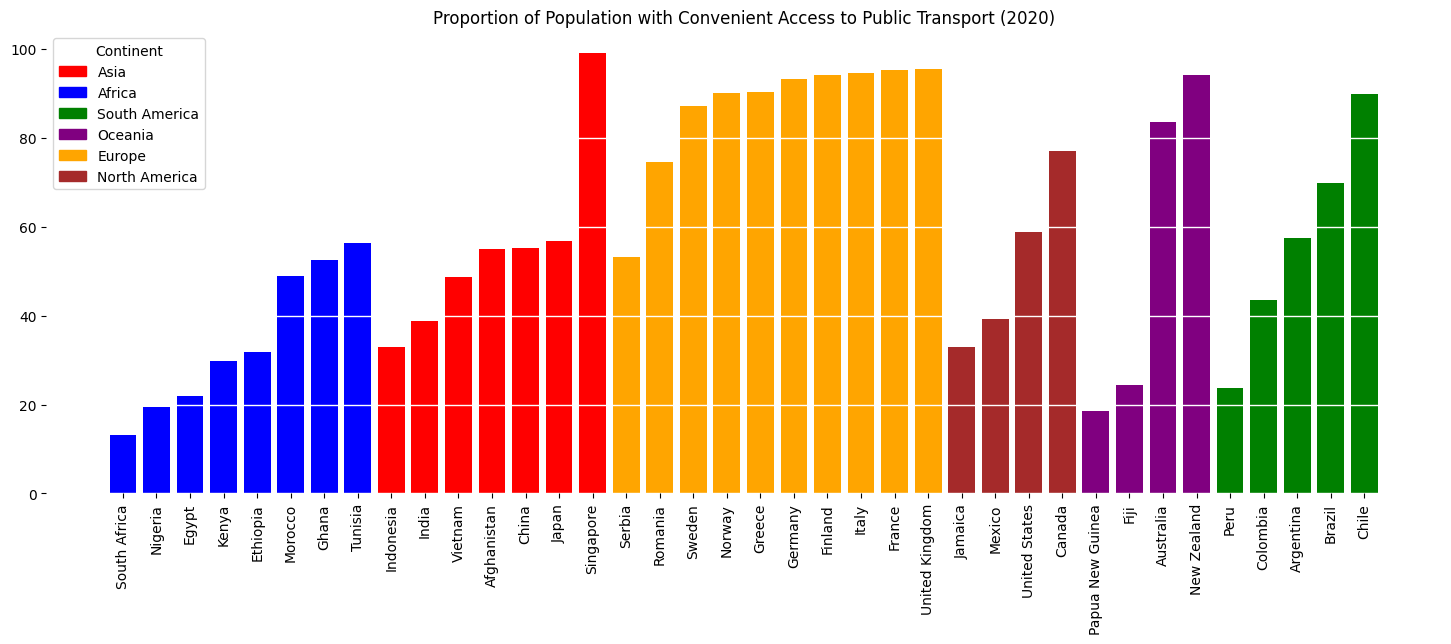

In [93]:
#countries = pd.merge(df['Entity'], df['Proportion of population that has convenient access to public transport'])
import matplotlib.patches as mpatches

df = pd.DataFrame(data)


# Mapping countries to continents
country_to_continent = {
    "Afghanistan": "Asia", "Tunisia": "Africa", "Morocco": "Africa", "Argentina": "South America", "Australia": "Oceania",
    "Brazil": "South America", "Canada": "North America", "China": "Asia", "Egypt": "Africa", "France": "Europe",
    "Germany": "Europe", "India": "Asia", "Indonesia": "Asia", "Italy": "Europe", "Japan": "Asia",
    "Mexico": "North America", "Nigeria": "Africa", "South Africa": "Africa", "United Kingdom": "Europe",
    "United States": "North America", "Singapore": "Asia", "Hong Kong": "Asia", "Finland": "Europe", "Sweden": "Europe",
    "Norway": "Europe", "New Zealand": "Oceania", "Chile": "South America", "Colombia": "South America", "Peru": "South America",
    "Kenya": "Africa", "Ghana": "Africa", "Ethiopia": "Africa", "Fiji": "Oceania", "Papua New Guinea": "Oceania", "Serbia": "Europe", "Jamaica":"North America",
    "Romania": "Europe", "Greece" : "Europe", "Vietnam": "Asia"
}

df["Continent"] = df["Entity"].map(country_to_continent)

# Drop rows where continent is missing
df = df.dropna(subset=["Continent"])

# Sort data by proportion
df_sorted = df.sort_values(by=["Continent", "Proportion of population that has convenient access to public transport"])


continent_colors = {
    "Asia": "red",
    "Africa": "blue",
    "South America": "green",
    "Oceania": "purple",
    "Europe": "orange",
    "North America": "brown"
}
df_sorted["Color"] = df_sorted["Continent"].map(continent_colors)

plt.figure(figsize=(18, 6))
plt.bar(df_sorted["Entity"], df_sorted["Proportion of population that has convenient access to public transport"], color=df_sorted["Color"])

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Proportion of Population with Convenient Access to Public Transport (2020)")
plt.xticks(rotation=90)
plt.grid(axis='y', color='white', linewidth=1)
legend_patches = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
plt.legend(handles=legend_patches, title="Continent")
plt.show()
